## Get the American Football Dataset from Quilt

Configure Quilt3 to look into our server and registry:

In [1]:
import quilt3
import pandas as pd


# Commented lines only necessary the first time
# quilt3.config('https://quilt3.hudltools.com/')
# quilt3.login() 
quilt3.config(default_remote_registry='s3://hudlrd-datasets') 

Configured to https://quilt3.hudltools.com

Get the American Football Dataset:

In [2]:
user = 'hudlrd'
package = 'american_football_tactical'
parquet = 'detections_df.parquet'

pkg = quilt3.Package.install(
    f'{user}/{package}', 
    registry=None,
    top_hash=None
)

pkg[parquet].fetch()
df = pd.read_parquet(parquet)

Copying: 100%|██████████| 455k/455k [00:00<00:00, 997kB/s]  
Copying: 100%|██████████| 425k/425k [00:00<00:00, 137MB/s]


In [3]:
pkg = quilt3.Package.install(
    f'{user}/{package}', 
    registry=None,
    top_hash=None
)

pkg[parquet].fetch()
df = pd.read_parquet(parquet)

Copying: 100%|██████████| 455k/455k [00:00<00:00, 970kB/s]  
Copying: 100%|██████████| 425k/425k [00:00<00:00, 136MB/s]


In [4]:
print("# examples: ", len(df))

df

# examples:  4189


bbxs   feed hardToTag  \
0     [[0.03383333333333333, 0.3968888888888889, 0.0...  right     False   
1     [[0.08083333333333333, 0.4035555555555556, 0.0...  right     False   
2     [[0.111, 0.40244444444444444, 0.01166666666666...  right     False   
3     [[0.1095, 0.4022222222222222, 0.016, 0.0337777...  right     False   
4     [[0.19866666666666663, 0.4144444444444445, 0.0...  right     False   
...                                                 ...    ...       ...   
4184  [[0.9864583333333333, 0.47583333333333333, 0.0...   left     False   
4185  [[0.7725, 0.58, 0.017333333333333423, 0.057333...   left     False   
4186                                                 []   left     False   
4187                                                 []   left     False   
4188                                                 []   left     False   

                                               job_link  \
0     https://www.hudl.com/annotations/tagging/#/af-...   
1     https://www.hudl.com/annotations/tagging/#/af-...   
2     https://www.hudl.com/annotations/tagging/#/af-...   
3     https://www.hudl.com/annotations/tagging/#/af-...   
4     https://www.hudl.com/annotations/tagging/#/af-...   
...                                                 ...   
4184  https://www.hudl.com/annotations/tagging/#/af-...   
4185  https://www.hudl.com/annotations/tagging/#/af-...   
4186  https://www.hudl.com/annotations/tagging/#/af-...   
4187  https://www.hudl.com/annotations/tagging/#/af-...   
4188  https://www.hudl.com/annotations/tagging/#/af-...   

                           labels  n_bbxs notMatchFrame  \
0       [player, player, referee]     3.0         False   
1                       [referee]     1.0         False   
2                       [referee]     1.0         False   
3                       [referee]     1.0         False   
4              [referee, referee]     2.0         False   
...                           ...     ...           ...   
4184                    [referee]     1.0         False   
4185  [referee, referee, referee]     3.0         False   
4186                           []     0.0          True   
4187                           []     0.0          True   
4188                           []     0.0          True   

                                                   path  \
0     https://hudlrd-experiments.s3.amazonaws.com/an...   
1     https://hudlrd-experiments.s3.amazonaws.com/an...   
2     https://hudlrd-experiments.s3.amazonaws.com/an...   
3     https://hudlrd-experiments.s3.amazonaws.com/an...   
4     https://hudlrd-experiments.s3.amazonaws.com/an...   
...                                                 ...   
4184  https://hudlrd-experiments.s3.amazonaws.com/an...   
4185  https://hudlrd-experiments.s3.amazonaws.com/an...   
4186  https://hudlrd-experiments.s3.amazonaws.com/an...   
4187  https://hudlrd-experiments.s3.amazonaws.com/an...   
4188  https://hudlrd-experiments.s3.amazonaws.com/an...   

                                                qc_link set_split_feed  \
0     https://www.hudl.com/annotations/tagging/#/af-...          train   
1     https://www.hudl.com/annotations/tagging/#/af-...          train   
2     https://www.hudl.com/annotations/tagging/#/af-...          train   
3     https://www.hudl.com/annotations/tagging/#/af-...          train   
4     https://www.hudl.com/annotations/tagging/#/af-...          train   
...                                                 ...            ...   
4184  https://www.hudl.com/annotations/tagging/#/af-...          train   
4185  https://www.hudl.com/annotations/tagging/#/af-...          train   
4186  https://www.hudl.com/annotations/tagging/#/af-...           None   
4187  https://www.hudl.com/annotations/tagging/#/af-...           None   
4188  https://www.hudl.com/annotations/tagging/#/af-...           None   

     set_split_random source_id tooBlurryToTag tooOccludedToTag  \
0               train      3616          False         

Clean up the dataset:

In [5]:
# Remove examples tagged as not match frames
aux_df = df
df = df[df.notMatchFrame == False]
print('# examples removed by notMatchFrame filtering: ', len(aux_df) - len(df))

# Remove examples with null boxes or labels
aux_df = df
df = df[~df.bbxs.isnull()]
df = df[~df.labels.isnull()]
print('# examples removed by isnull filtering: ', len(aux_df) - len(df))

# Remove examples with no boxes or labels
aux_df = df
df = df[df.bbxs.map(lambda d: len(d)) > 0]
df = df[df.labels.map(lambda d: len(d)) > 0]
print('# examples removed by empty box or label list filtering: ', len(aux_df) - len(df))

# Remove invalid bounding boxes where x, y, width or height are smaller or equak than 
aux_df = df
df = df[df.bbxs.map(lambda bbxs: len(set([True for b in bbxs if b[2] <= 0 or b[3] <= 0]))) == 0]
print('# examples removed by invalid box filtering: ', len(aux_df) - len(df))

# Reset dataframe indices
df = df.reset_index(drop=True)

# examples removed by notMatchFrame filtering:  2362
# examples removed by isnull filtering:  0
# examples removed by empty box or label list filtering:  11
# examples removed by invalid box filtering:  9


In [6]:
print('# examples: ', len(df))

df

# examples:  1807


bbxs   feed hardToTag  \
0     [[0.03383333333333333, 0.3968888888888889, 0.0...  right     False   
1     [[0.08083333333333333, 0.4035555555555556, 0.0...  right     False   
2     [[0.111, 0.40244444444444444, 0.01166666666666...  right     False   
3     [[0.1095, 0.4022222222222222, 0.016, 0.0337777...  right     False   
4     [[0.19866666666666663, 0.4144444444444445, 0.0...  right     False   
...                                                 ...    ...       ...   
1802  [[0.853, 0.5122222222222222, 0.014166666666666...   left     False   
1803  [[0.9841666666666666, 0.468, 0.013833333333333...   left     False   
1804  [[0.9843333333333333, 0.4762222222222222, 0.01...   left     False   
1805  [[0.9864583333333333, 0.47583333333333333, 0.0...   left     False   
1806  [[0.7725, 0.58, 0.017333333333333423, 0.057333...   left     False   

                                               job_link  \
0     https://www.hudl.com/annotations/tagging/#/af-...   
1     https://www.hudl.com/annotations/tagging/#/af-...   
2     https://www.hudl.com/annotations/tagging/#/af-...   
3     https://www.hudl.com/annotations/tagging/#/af-...   
4     https://www.hudl.com/annotations/tagging/#/af-...   
...                                                 ...   
1802  https://www.hudl.com/annotations/tagging/#/af-...   
1803  https://www.hudl.com/annotations/tagging/#/af-...   
1804  https://www.hudl.com/annotations/tagging/#/af-...   
1805  https://www.hudl.com/annotations/tagging/#/af-...   
1806  https://www.hudl.com/annotations/tagging/#/af-...   

                                                 labels  n_bbxs notMatchFrame  \
0                             [player, player, referee]     3.0         False   
1                                             [referee]     1.0         False   
2                                             [referee]     1.0         False   
3                                             [referee]     1.0         False   
4                                    [referee, referee]     2.0         False   
...                                                 ...     ...           ...   
1802  [player, player, referee, player, player, play...    13.0         False   
1803  [player, player, player, player, player, playe...    16.0         False   
1804  [player, player, player, player, player, playe...    13.0         False   
1805                                          [referee]     1.0         False   
1806                        [referee, referee, referee]     3.0         False   

                                                   path  \
0     https://hudlrd-experiments.s3.amazonaws.com/an...   
1     https://hudlrd-experiments.s3.amazonaws.com/an...   
2     https://hudlrd-experiments.s3.amazonaws.com/an...   
3     https://hudlrd-experiments.s3.amazonaws.com/an...   
4     https://hudlrd-experiments.s3.amazonaws.com/an...   
...                                                 ...   
1802  https://hudlrd-experiments.s3.amazonaws.com/an...   
1803  https://hudlrd-experiments.s3.amazonaws.com/an...   
1804  https://hudlrd-experiments.s3.amazonaws.com/an...   
1805  https://hudlrd-experiments.s3.amazonaws.com/an...   
1806  https://hudlrd-experiments.s3.amazonaws.com/an...   

                                                qc_link set_split_feed  \
0     https://www.hudl.com/annotations/tagging/#/af-...          train   
1     https://www.hudl.com/annotations/tagging/#/af-...          train   
2     https://www.hudl.com/annotations/tagging/#/af-...          train   
3     https://www.hudl.com/annotations/tagging/#/af-...          train   
4     https://www.hudl.com/annotations/tagging/#/af-...          train   
...                                                 ...            ...   
1802  https://www.hudl.com/annotations/tagging/#/af-...          train   
1803  https://www.hudl.com/annotations/tagging/#/af-...          train   
1804  https://www.hudl.com/annotations/tagging/#/af-...          train   
1805  h

At this point is probably a good idea to save the dataset's images to the local machine and update the dataframe accordingly:

In [7]:
import shutil
import requests
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor


cache = Path('/root/cvdev/aft_images/')
cache.mkdir(parents=True, exist_ok=True)


def save_df_images(df):
    def save_df_image(i):
        local_path = cache / f"{str(i).zfill(4)}.png"
        if not local_path.exists():
            with open(local_path, 'wb') as f:
                response = requests.get(df.at[i, 'path'], stream=True)
                shutil.copyfileobj(response.raw, f)
        df.at[i, 'path'] = str(local_path.absolute())

    with ThreadPoolExecutor() as executor:
        list(executor.map(save_df_image, range(len(df))))

In [8]:
save_df_images(df)

In [9]:
df

bbxs   feed hardToTag  \
0     [[0.03383333333333333, 0.3968888888888889, 0.0...  right     False   
1     [[0.08083333333333333, 0.4035555555555556, 0.0...  right     False   
2     [[0.111, 0.40244444444444444, 0.01166666666666...  right     False   
3     [[0.1095, 0.4022222222222222, 0.016, 0.0337777...  right     False   
4     [[0.19866666666666663, 0.4144444444444445, 0.0...  right     False   
...                                                 ...    ...       ...   
1802  [[0.853, 0.5122222222222222, 0.014166666666666...   left     False   
1803  [[0.9841666666666666, 0.468, 0.013833333333333...   left     False   
1804  [[0.9843333333333333, 0.4762222222222222, 0.01...   left     False   
1805  [[0.9864583333333333, 0.47583333333333333, 0.0...   left     False   
1806  [[0.7725, 0.58, 0.017333333333333423, 0.057333...   left     False   

                                               job_link  \
0     https://www.hudl.com/annotations/tagging/#/af-...   
1     https://www.hudl.com/annotations/tagging/#/af-...   
2     https://www.hudl.com/annotations/tagging/#/af-...   
3     https://www.hudl.com/annotations/tagging/#/af-...   
4     https://www.hudl.com/annotations/tagging/#/af-...   
...                                                 ...   
1802  https://www.hudl.com/annotations/tagging/#/af-...   
1803  https://www.hudl.com/annotations/tagging/#/af-...   
1804  https://www.hudl.com/annotations/tagging/#/af-...   
1805  https://www.hudl.com/annotations/tagging/#/af-...   
1806  https://www.hudl.com/annotations/tagging/#/af-...   

                                                 labels  n_bbxs notMatchFrame  \
0                             [player, player, referee]     3.0         False   
1                                             [referee]     1.0         False   
2                                             [referee]     1.0         False   
3                                             [referee]     1.0         False   
4                                    [referee, referee]     2.0         False   
...                                                 ...     ...           ...   
1802  [player, player, referee, player, player, play...    13.0         False   
1803  [player, player, player, player, player, playe...    16.0         False   
1804  [player, player, player, player, player, playe...    13.0         False   
1805                                          [referee]     1.0         False   
1806                        [referee, referee, referee]     3.0         False   

                                 path  \
0     /root/cvdev/aft_images/0000.png   
1     /root/cvdev/aft_images/0001.png   
2     /root/cvdev/aft_images/0002.png   
3     /root/cvdev/aft_images/0003.png   
4     /root/cvdev/aft_images/0004.png   
...                               ...   
1802  /root/cvdev/aft_images/1802.png   
1803  /root/cvdev/aft_images/1803.png   
1804  /root/cvdev/aft_images/1804.png   
1805  /root/cvdev/aft_images/1805.png   
1806  /root/cvdev/aft_images/1806.png   

                                                qc_link set_split_feed  \
0     https://www.hudl.com/annotations/tagging/#/af-...          train   
1     https://www.hudl.com/annotations/tagging/#/af-...          train   
2     https://www.hudl.com/annotations/tagging/#/af-...          train   
3     https://www.hudl.com/annotations/tagging/#/af-...          train   
4     https://www.hudl.com/annotations/tagging/#/af-...          train   
...                                                 ...            ...   
1802  https://www.hudl.com/annotations/tagging/#/af-...          train   
1803  https://www.hudl.com/annotations/tagging/#/af-...          train   
1804  https://www.hudl.com/annotations/tagging/#/af-...          train   
1805  https://www.hudl.com/annotations/tagging/#/af-...          train   
1806  https://www.hudl.com/annotations/tagging/#/af-...          train   

     set_split_random source_id tooBlurryToTag tooOccludedToTag  \
0      

## Register the Dataset in Detectron2

Get the dataset's unique labels:

In [10]:
unique_labels = set()

for labels in df["labels"]:
    if labels is not None:
        unique_labels.update(labels)

unique_labels = list(unique_labels)
        
print("Unique labels:", unique_labels)

Unique labels: ['ball carrier', 'other', 'ball', 'referee', 'player']


Define the get_dicts function that will return the items in our dataset in the format expected by Detectron2:

In [11]:
import numpy as np
from detectron2.structures import BoxMode


def get_dicts(df, partition):
    df = df[df.set_split_random == partition]
    
    records = []
    for i, row in df.iterrows():
        record = {}
        record["file_name"] = row['path']
        record["image_id"] = i
        record["height"] = 2000
        record["width"] = 2666

        annotations = []
        for bbox, label in zip(row["bbxs"], row["labels"]):
            ann = {}
            bbox = bbox * np.asanyarray([record["width"], record["height"]] * 2)
            ann["bbox"] = bbox.tolist()
            ann["bbox_mode"] = BoxMode.XYWH_ABS
            ann["category_id"] = unique_labels.index(label)
            annotations.append(ann)

        record["annotations"] =  annotations
        records.append(record)
    
    return records

In [12]:
print("# examples in train:", len(get_dicts(df, "train")))
print("# examples in dev:", len(get_dicts(df, "dev")))
print("# examples in test:", len(get_dicts(df, "test")))

# examples in train: 1538
# examples in dev: 134
# examples in test: 135


Tell Detectron2 about the previous function:

In [13]:
from detectron2.data import DatasetCatalog, MetadataCatalog


for partition in ["train", "dev", "test"]:
    DatasetCatalog.register(
        f"AmericanFootballTactical/{partition}", 
        lambda partition = partition: get_dicts(df, partition)
    )
    MetadataCatalog.get(
        f"AmericanFootballTactical/{partition}"
    ).set(thing_classes=unique_labels)

Let's make sure the dataset has been registered

In [14]:
DatasetCatalog.get('AmericanFootballTactical/train')

[{'file_name': '/root/cvdev/aft_images/0000.png',
  'image_id': 0,
  'height': 2000,
  'width': 2666,
  'annotations': [{'bbox': [90.19966666666667,
     793.7777777777778,
     43.989000000000004,
     80.8888888888889],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 4},
   {'bbox': [42.21166666666667, 740.0, 32.43633333333333, 68.88888888888889],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 4},
   {'bbox': [418.562,
     819.5555555555555,
     32.436333333333316,
     62.22222222222218],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 3}]},
 {'file_name': '/root/cvdev/aft_images/0002.png',
  'image_id': 2,
  'height': 2000,
  'width': 2666,
  'annotations': [{'bbox': [295.926,
     804.8888888888889,
     31.10333333333331,
     65.77777777777783],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 3}]},
 {'file_name': '/root/cvdev/aft_images/0003.png',
  'image_id': 3,
  'height': 2000,
  'width': 2666,
  'annotations': [{'bbox': [291.92

Have a look at the data:

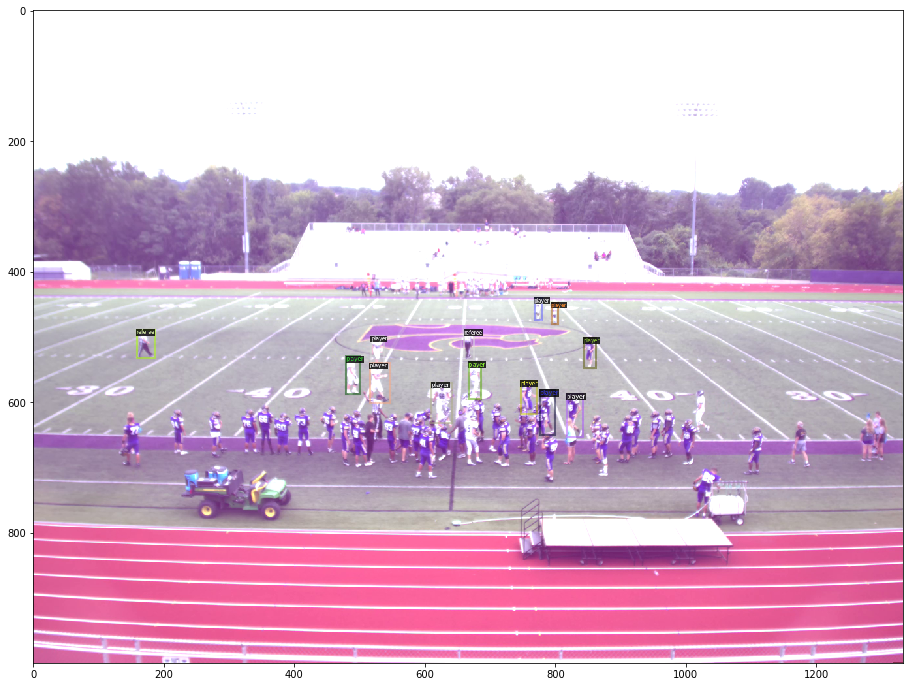

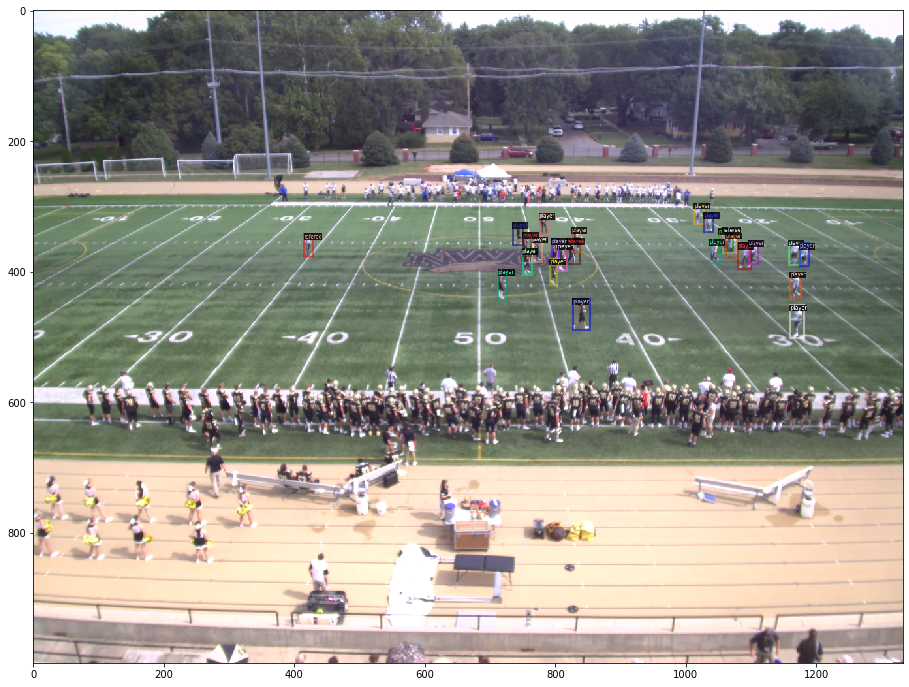

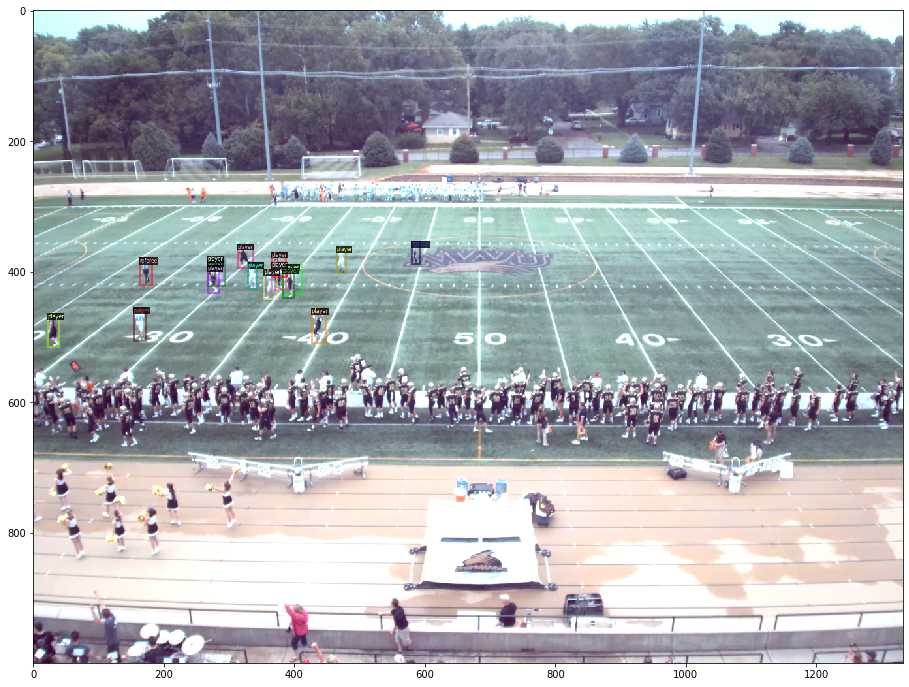

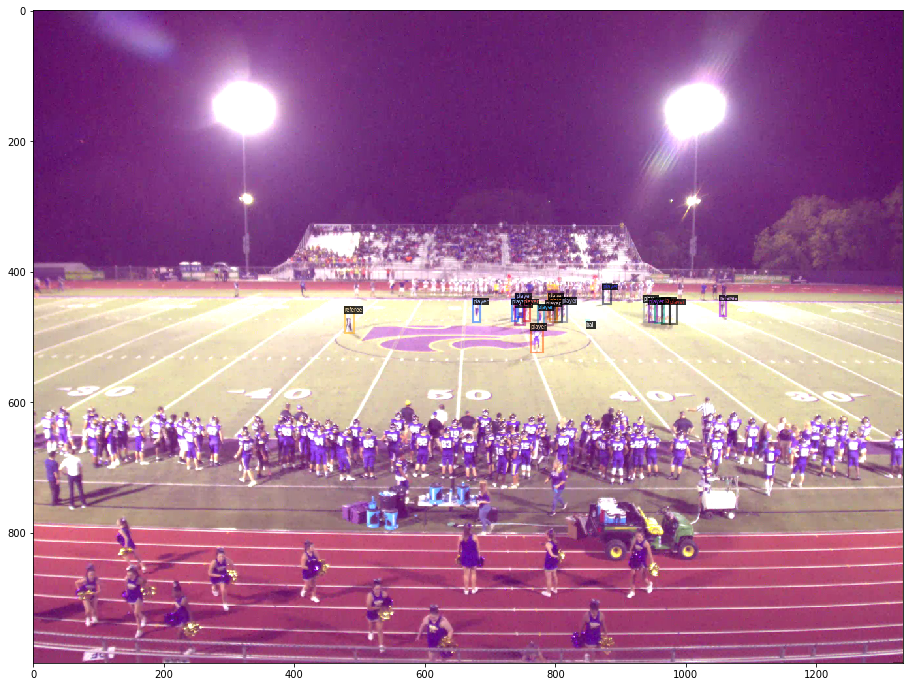

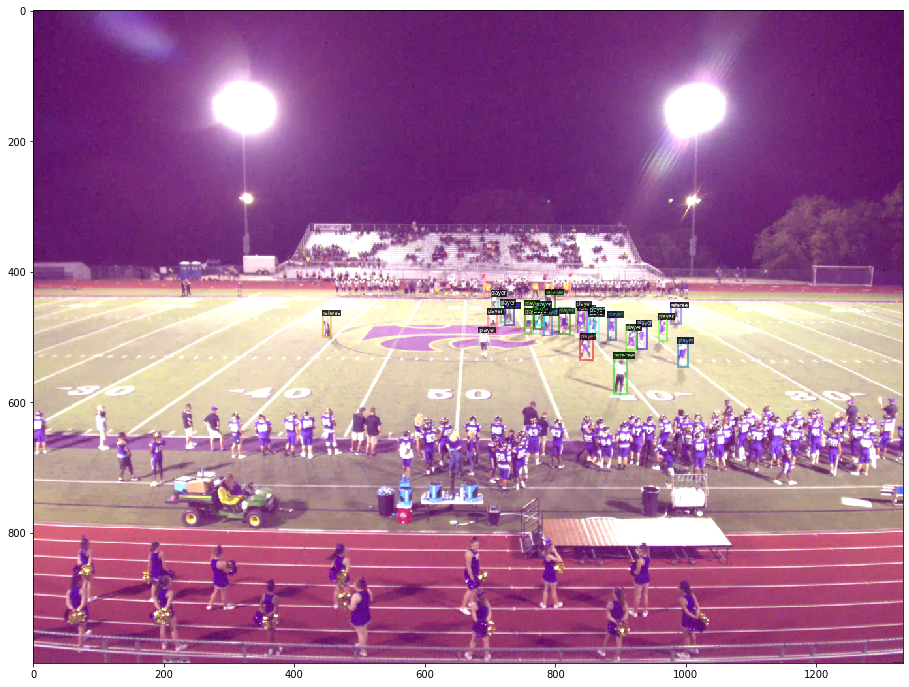

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
import requests
from PIL import Image, ImageFile
from detectron2.utils.visualizer import Visualizer


figsize = (16, 12)
ImageFile.LOAD_TRUNCATED_IMAGES = True

metadata = MetadataCatalog.get("AmericanFootballTactical/train")
records = get_dicts(df, "train")

for i, r in enumerate(random.sample(records, 5)):
#     img = Image.open(requests.get(r["file_name"], stream=True).raw)
    img = Image.open(r["file_name"])
    img = np.asanyarray(img)
    
    visualizer = Visualizer(img, metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(r)
    
    plt.figure(i, figsize=figsize)
    plt.imshow(vis.get_image())